In [10]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

N = 64
NB = 9
c = 0.7

fft = np.fft.fft
ifft = np.fft.ifft
rand = np.random.random
shuffle = np.random.shuffle

def clipped(xs, c):
    return not all([abs(s)<=c for s in xs])

def clip(xs, c):
    return np.clip(xs, -c, c)

def papr(xs):
    power = np.average([abs(s)**2 for s in xs])
    max_power = max(map(abs, xs))**2
    return 10*np.log10(max_power/power)

tones_for_clip = np.arange(N/2, dtype=np.int)
shuffle(tones_for_clip)
tones_for_clip = sorted(tones_for_clip[:NB])
tones_for_clip = set([c+1 for c in tones_for_clip] + [N-1-c for c in reversed(tones_for_clip)])
M = np.ones(N, dtype=np.int)    # tones used by signal
L = np.zeros(N, dtype=np.int)   # tones used by clipped signals
for i in tones_for_clip: M[i], L[i] = 0, 1

# Peak-to-Average Power Ratio (PAPR)
$$\text{PAPR}_{dB}=10log_{10}\frac{|x|^2_{peak}}{x_{rms}^2}$$

To reduce it, we clip the signal in time domain and move the clipped part to low Signal-to-Noise Ratio (SNR) tones.

# Fourier Projection Algorithm (FPA)

## FPA is for reduing PAPR

## Inputs

1. Input time domain signal $x_s$, the length of $x_s$ is $N$, e.g. $N=8$ and 

$$x_s = [ 0.2, 0.5, -0.1, 0.9, 0.2, -0.4, 0.3, 0.1]$$

2. Input frequency domain signal $$X_s = \text{fft}(x_s)$$

3. Low Signal-to-Noise Ratio (SNR) tones in frequency domain $L$, e.g. $[2, 5]$ means the 2nd and 5th tones are low SNR tones.

4. Tones used for signal $S=\overline{L}$.

## Outputs

Output time domain signal $x_c$.

## Steps
1. Set $x_s' = x_s$.
2. Clip $x_s'$ to a lower level $c$  as $x_c$, where $c < |x|_{peak}$)
3. If $x_s'$ does not change value ($x_s' = x_c$), we are done, else continue
4. Project the clipped signal to frequency domain. $$X_c = \text{fft}(x_c)$$
5. Copy original data in high SNR tones to $X_c$. $$X_c(S) = X_s(S)$$
6. Project $X_c$ to time domain. $$x_s' = \text{ifft}(X_c)$$
6. Goto step 2.

<IPython.core.display.Javascript object>


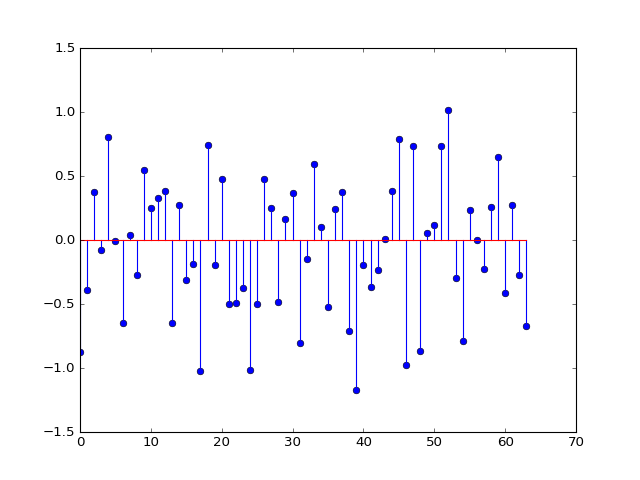

PAPR: 6.84 dB


In [11]:
xs = 2*rand(N)-1
Xs = fft(xs)*M
xs = ifft(Xs).real
plt.figure('Original time domain signal with low SNR tones: xs')
markerline, stemlines, baseline = plt.stem(range(N), xs)
print('PAPR: {0:.2f} dB'.format(papr(xs)))

<IPython.core.display.Javascript object>


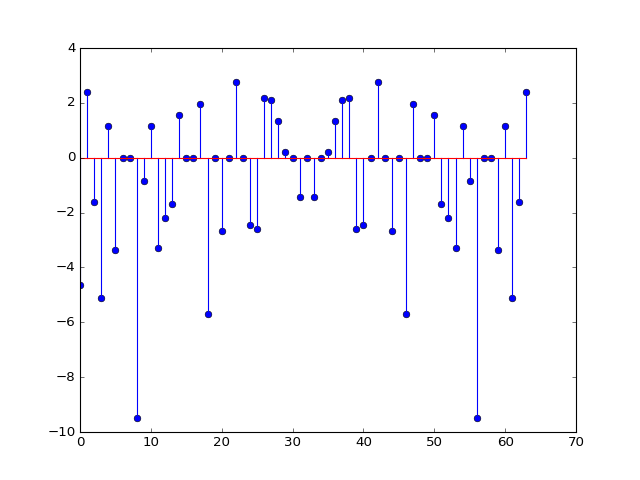

In [12]:
plt.figure('Original frequency domain signal without low SNR tones: Xs')
markerline, stemlines, baseline = plt.stem(range(N), Xs.real)

<IPython.core.display.Javascript object>


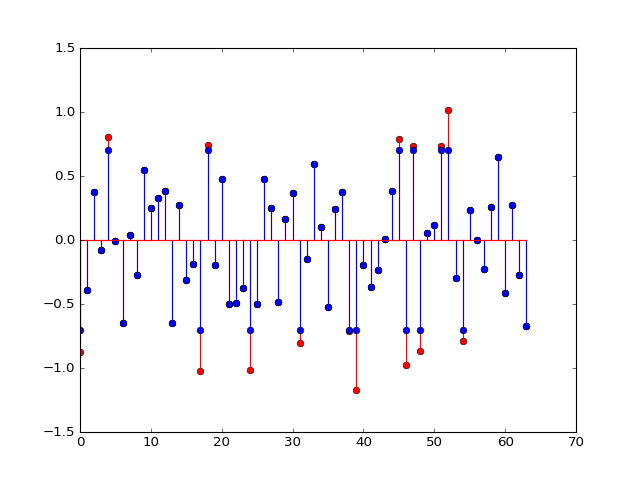

In [13]:
xc = clip(xs, c)
plt.figure('Clipped time domain signal without low SNR tones: xc')
markerline, stemlines, baseline = plt.stem(range(N), xs)
plt.setp(markerline, 'markerfacecolor', 'r')
plt.setp(stemlines, 'color', 'r', 'linewidth', 1)
markerline, stemlines, baseline = plt.stem(range(N), xc)

<IPython.core.display.Javascript object>


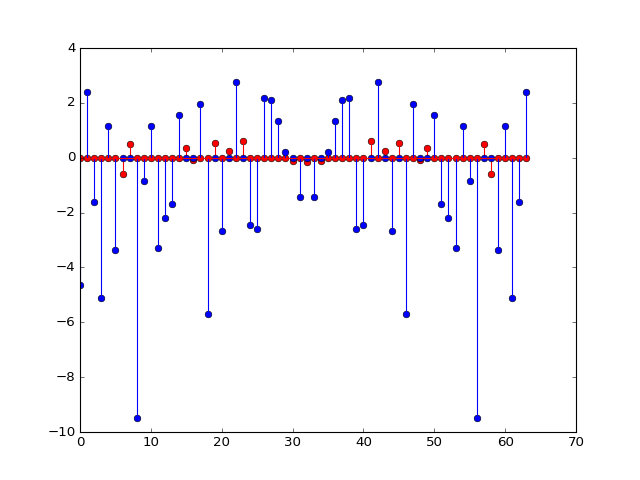

In [14]:
Xc = fft(xc)*L
plt.figure('Clipped frequency domain signal: Xc')
markerline, stemlines, baseline = plt.stem(range(N), Xc.real)
plt.setp(markerline, 'markerfacecolor', 'r')
plt.setp(stemlines, 'color', 'r', 'linewidth', 1)
markerline, stemlines, baseline = plt.stem(range(N), Xs.real)

<IPython.core.display.Javascript object>


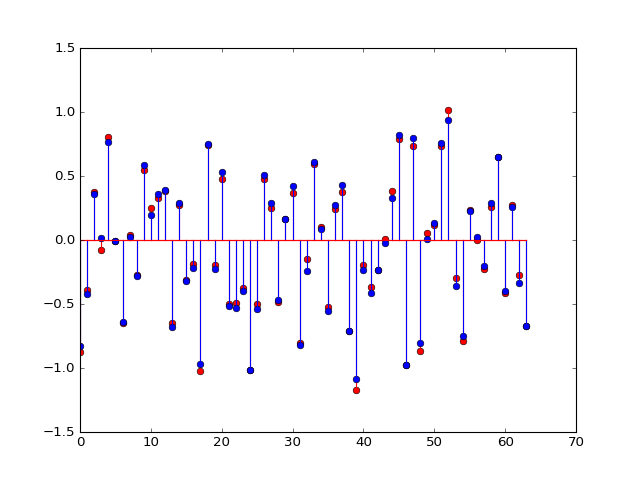

In [15]:
xc = ifft(Xc+Xs)
plt.figure('Clipped time domain signal with low SNR tones: xc')
markerline, stemlines, baseline = plt.stem(range(N), xs)
plt.setp(markerline, 'markerfacecolor', 'r')
plt.setp(stemlines, 'color', 'r', 'linewidth', 1)
markerline, stemlines, baseline = plt.stem(range(N), xc.real)

In [16]:
print('Original PAPR: {0:.2f} dB'.format(papr(xs.real)))
print('Result PAPR: {0:.2f} dB'.format(papr(xc.real)))

Original PAPR: 6.84 dB
Result PAPR: 6.13 dB


In [17]:
i = 0
max_iter = 5
xc = clip(xc, c)

while(clipped(xc, c) and i<max_iter):
    xc = clipped(xc)
    Xc = fft(xc.real)*L
    xc = ifft(Xc+Xs)
    i += 1


In [18]:
print('Original PAPR: {0:.2f} dB'.format(papr(xs.real)))
print('Result PAPR: {0:.2f} dB'.format(papr(xc.real)))

Original PAPR: 6.84 dB
Result PAPR: 3.34 dB
